## Import Libraries

In [3]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from tabulate import tabulate

## Color Hex Codes

In [5]:
colorsLinear1 = "#fc3d03"
colorsLinear2 = "#3d03fc"
colorsLinear3 = "#00008B"

In [6]:
colorsHeatmap = [colorsLinear2, colorsLinear1]
colors3dHeatmap = [colorsLinear3, colorsLinear1]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colorsHeatmap)
cmap2 = LinearSegmentedColormap.from_list("custom_cmap", colors3dHeatmap)

In [7]:
colorsGraph1 = "#00ffff"
colorsGraph2 = "#17026b"
colorsGraph3 = "#39ff14"
colorsGraph4 = "#bd0b9a"
colorsGraph5 = "#00008B"
colorsGraph6 = "#d473d4"
colorsGraph7 = "#870404"
colors = [colorsGraph1, colorsGraph2, colorsGraph3, colorsGraph4, colorsGraph5, colorsGraph6, colorsGraph7]

---
---

## Step 1: Exploratory Data Analysis (EDA)

In [10]:
data = pd.read_csv("C:/Users/aryam/Downloads/NCSEF 24-25/Dataset.csv")
data.head()

,Reading,Speed,Altitude,Density,Temp
0,1,33.5,5856,0.668,-29.06
1,2,29.9,5891,0.669,-29.29
2,3,30.4,5892,0.685,-29.30
3,4,32.2,5897,0.701,-28.33
4,5,33.5,5929,0.665,-28.54


In [11]:
missing_values = data.isnull().sum()
data_summary = data.describe()

In [12]:
missing_values

Reading     0
Speed       0
Altitude    0
Density     0
Temp        0
dtype: int64

In [13]:
data_summary

,Reading,Speed,Altitude,Density,Temp
count,400.000000,400.000000,400.000000,400.000000,400.00000
mean,200.500000,34.771500,6926.105000,0.645010,-36.46205
std,115.614301,7.274151,606.249292,0.038427,5.11703
min,1.000000,21.500000,5856.000000,0.562000,-50.18000
25%,100.750000,29.400000,6410.750000,0.614000,-39.98750
50%,200.500000,33.500000,6864.000000,0.645500,-35.31500
75%,300.250000,38.900000,7402.000000,0.670000,-32.36250
max,400.000000,57.200000,8314.000000,0.720000,-28.33000


In [14]:
print(data.dtypes)

Reading       int64
Speed       float64
Altitude      int64
Density     float64
Temp        float64
dtype: object


### Visuializing the Data Distributions:

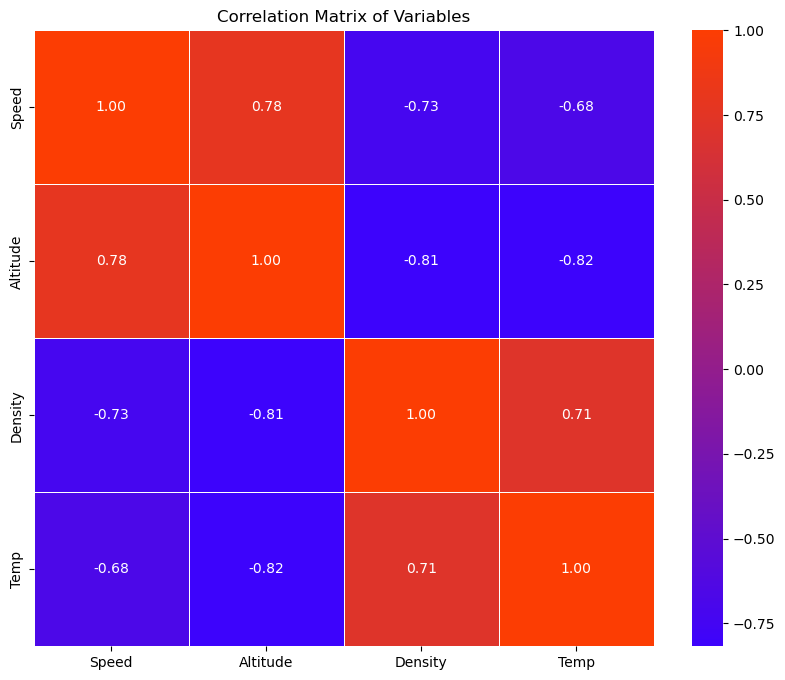

In [16]:
features = ['Speed', 'Altitude', 'Density', 'Temp']
for feature in features:
    data[feature] = data[feature].replace(r'[^\d.-]', '', regex=True).astype(float)

correlation_matrix = data[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()

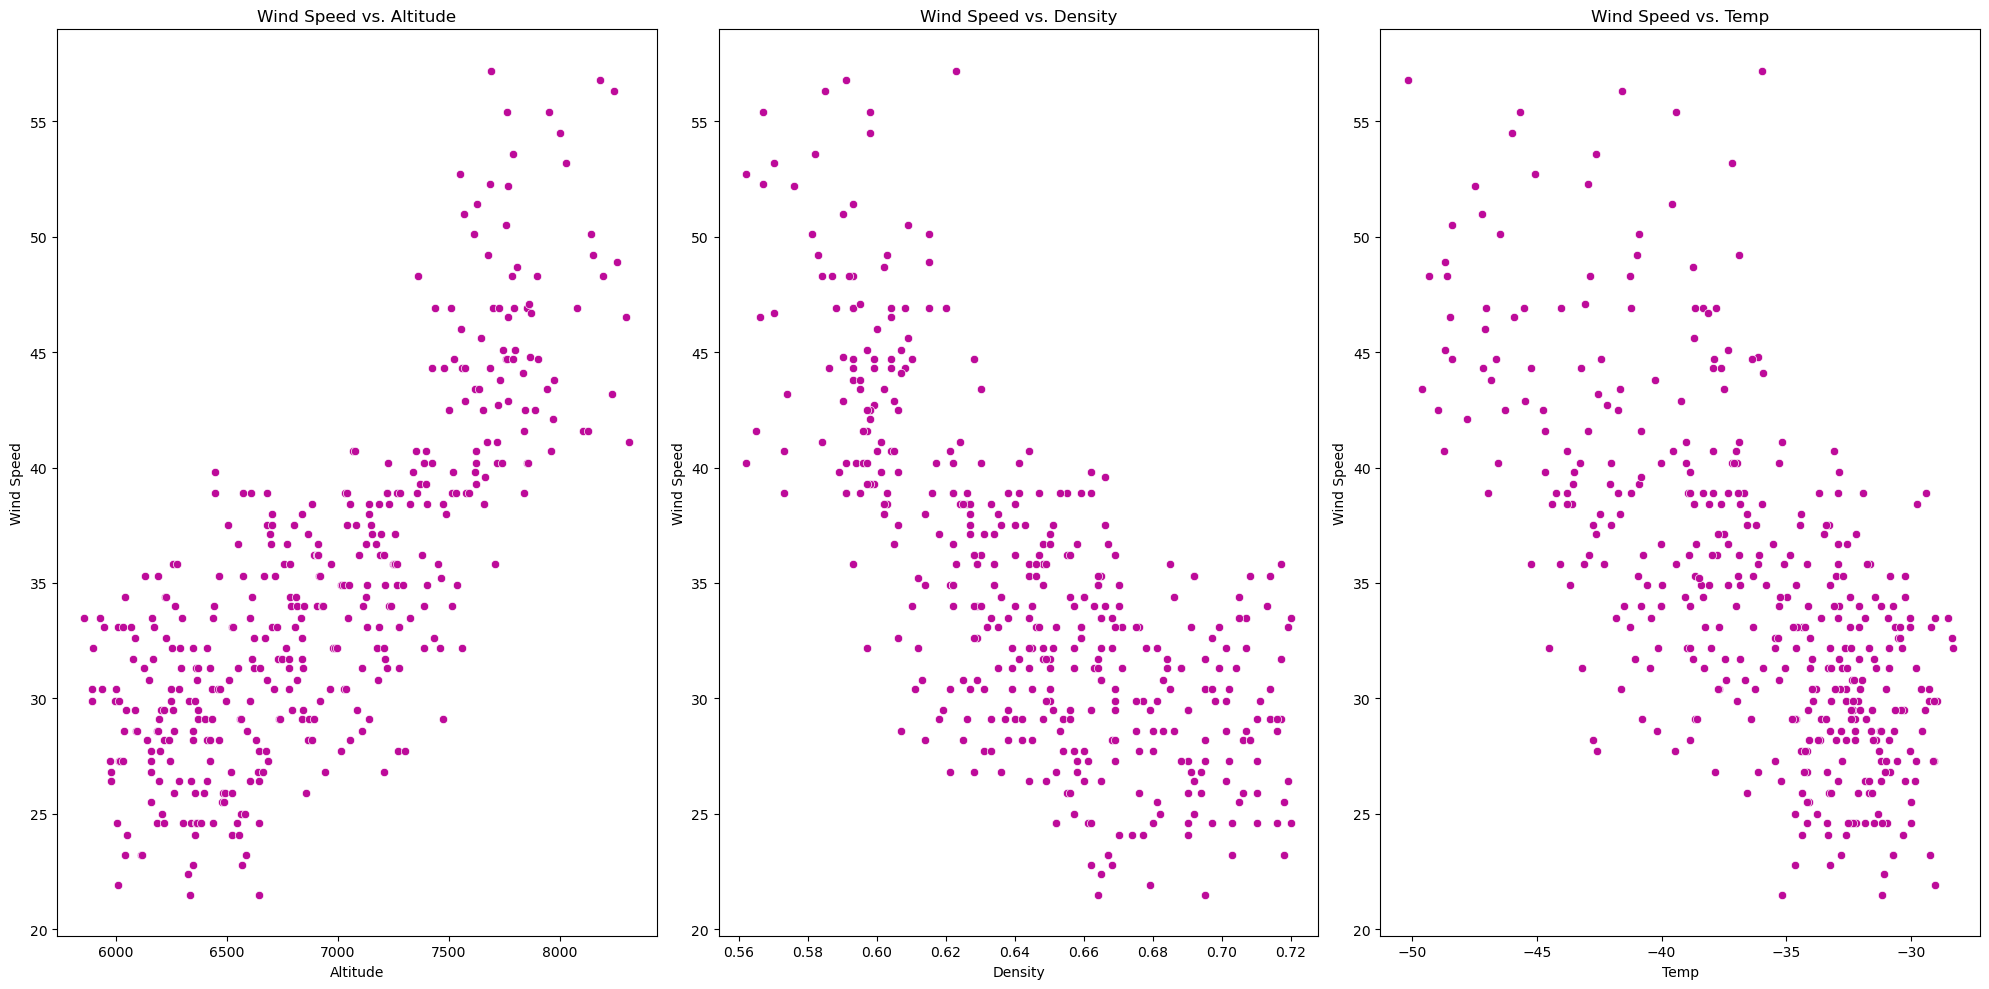

In [17]:
features = [col for col in data.columns if col != 'Speed' and col != 'Reading']
plt.figure(figsize=(20, 10))

features = [col for col in data.columns if col != 'Speed' and col != 'Reading']

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    sns.scatterplot(x=data[feature], y=data['Speed'], color=colorsGraph4)
    plt.title(f'Wind Speed vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Wind Speed')

plt.tight_layout()
plt.show()

---
---

## Step 2: Regression Analysis

In [20]:
X = data[['Altitude', 'Density', 'Temp']]
y = data['Speed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((280, 3), (120, 3))

---

#### Linear Regression

In [23]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients_lin = linear_reg.coef_
intercept_lin = linear_reg.intercept_
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Coefficients: {coefficients_lin}")
print(f"Intercept: {intercept_lin}")

Mean Absolute Error (MAE): 3.42
Mean Squared Error (MSE): 18.67
R^2 Score: 0.70
Coefficients: [ 5.82625437e-03 -4.18203840e+01 -1.46804105e-01]
Intercept: 15.944294225963581


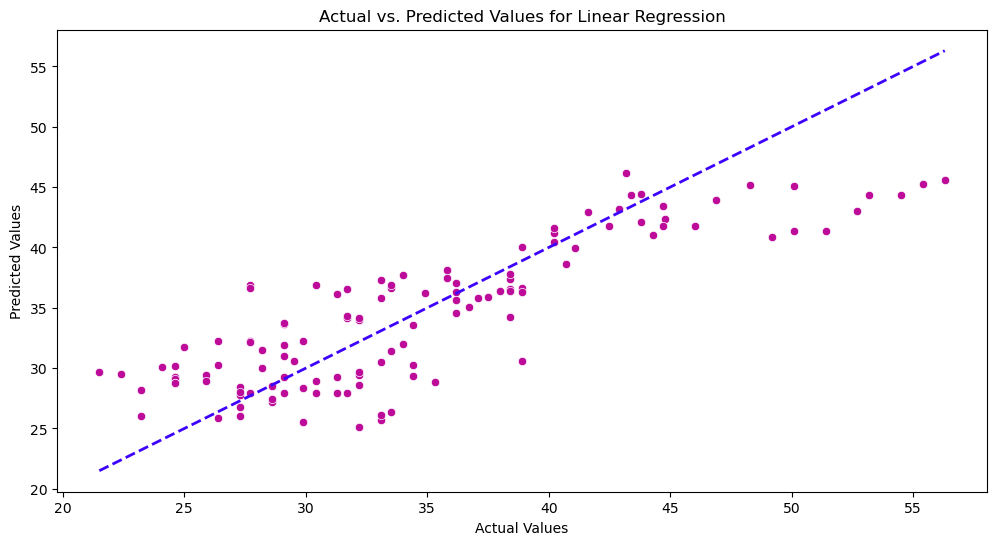

In [24]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

---

#### Polynomial Regression

In [27]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
coefficients_poly = poly_reg.coef_
intercept_poly = poly_reg.intercept_

print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"R^2 Score: {r2_poly:.2f}")
print(f"Coefficients: {coefficients_poly}")
print(f"Intercept: {intercept_poly}")

mae_poly, mse_poly, r2_poly, coefficients_poly, intercept_poly

Mean Absolute Error (MAE): 3.08
Mean Squared Error (MSE): 14.69
R^2 Score: 0.76
Coefficients: [ 0.00000000e+00 -4.95536589e-02 -2.50043441e+02 -2.77057437e+00
  3.80685177e-06  1.49848774e-02  1.98203822e-04  1.81117118e+02
  3.60637978e+00  1.35672839e-02]
Intercept: 228.4299192035278


(3.080157261010805,
 14.689407493734969,
 0.7636899372548289,
 array([ 0.00000000e+00, -4.95536589e-02, -2.50043441e+02, -2.77057437e+00,
         3.80685177e-06,  1.49848774e-02,  1.98203822e-04,  1.81117118e+02,
         3.60637978e+00,  1.35672839e-02]),
 228.4299192035278)

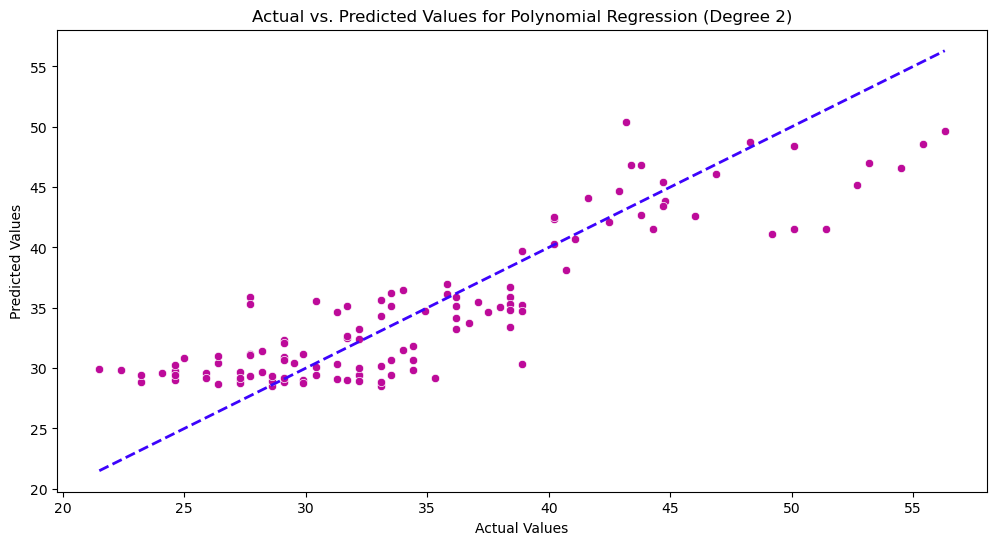

In [28]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_pred_poly, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for Polynomial Regression (Degree 2)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

---

#### Random Forest Regression

In [31]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
feature_importances_rf = random_forest.feature_importances_

print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R^2 Score: {r2_rf:.2f}")
print(f"Feature Importances: {feature_importances_rf}")

mae_rf, mse_rf, r2_rf, feature_importances_rf

Mean Absolute Error (MAE): 3.73
Mean Squared Error (MSE): 20.86
R^2 Score: 0.66
Feature Importances: [0.74190617 0.13230721 0.12578662]


(3.72719166666667,
 20.861548691666705,
 0.664398044482614,
 array([0.74190617, 0.13230721, 0.12578662]))

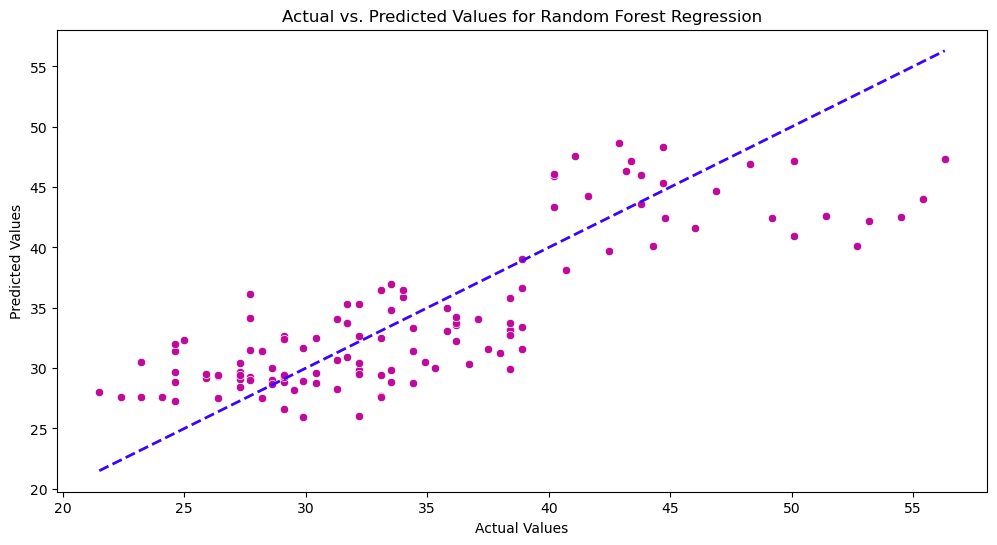

In [32]:
plt.figure(figsize = (12,6))

sns.scatterplot(x=y_test, y=y_pred_rf, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

---

#### MLP Regression

In [35]:
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"Mean Absolute Error (MAE): {mae_mlp:.2f}")
print(f"Mean Squared Error (MSE): {mse_mlp:.2f}")
print(f"R^2 Score: {r2_mlp:.2f}")

mae_mlp, mse_mlp, r2_mlp

Mean Absolute Error (MAE): 4.29
Mean Squared Error (MSE): 29.77
R^2 Score: 0.52


(4.289374939180933, 29.768315157627672, 0.5211139437913165)

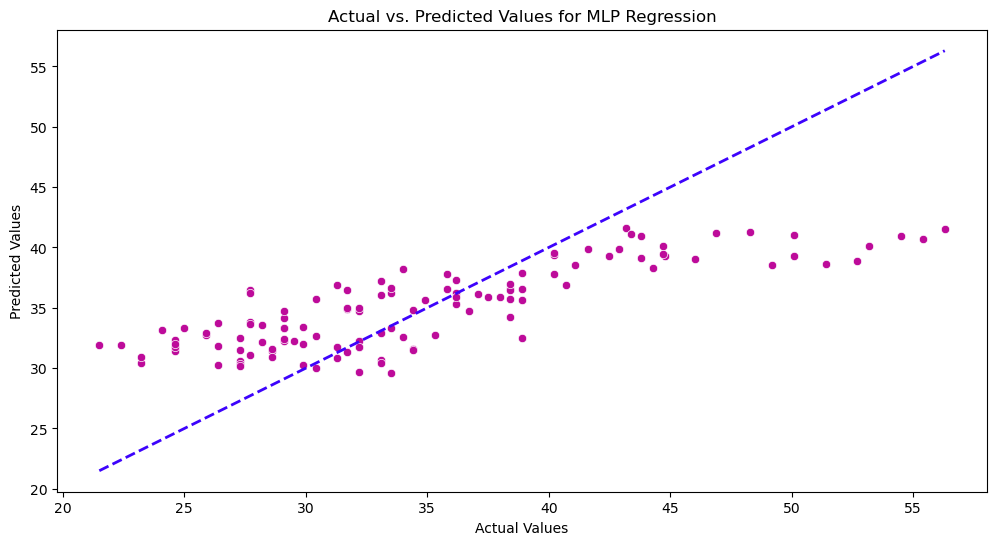

In [36]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_pred_mlp, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for MLP Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

---

#### Decision Tree Regression

In [39]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
feature_importances_dt = decision_tree.feature_importances_

print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R^2 Score: {r2_dt:.2f}")
print(f"Feature Importances: {feature_importances_dt}")

mae_dt, mse_dt, r2_dt, feature_importances_dt

Mean Absolute Error (MAE): 4.73
Mean Squared Error (MSE): 33.48
R^2 Score: 0.46
Feature Importances: [0.7799069  0.12240133 0.09769178]


(4.725833333333332,
 33.47824999999999,
 0.46143182688119544,
 array([0.7799069 , 0.12240133, 0.09769178]))

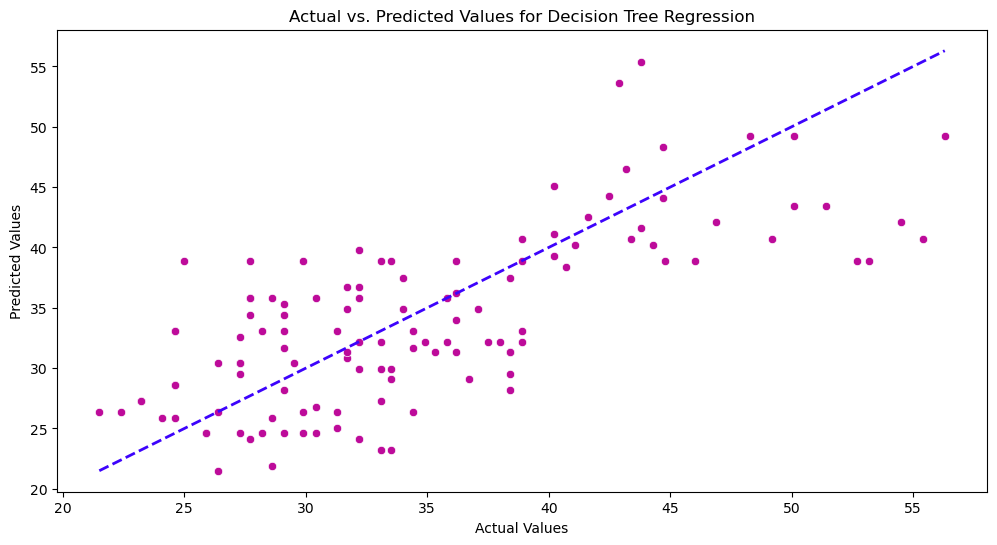

In [40]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_pred_dt, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for Decision Tree Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

---

#### Gradient Boosting Regression

In [43]:
gradient_boost = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boost.fit(X_train, y_train)

y_pred_gb = gradient_boost.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
feature_importances_gb = gradient_boost.feature_importances_

print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"R^2 Score: {r2_gb:.2f}")
print(f"Feature Importances: {feature_importances_gb}")

mae_gb, mse_gb, r2_gb, feature_importances_gb

Mean Absolute Error (MAE): 3.84
Mean Squared Error (MSE): 22.14
R^2 Score: 0.64
Feature Importances: [0.82856809 0.08613563 0.08529628]


(3.842208131803595,
 22.138547942377922,
 0.643854821538475,
 array([0.82856809, 0.08613563, 0.08529628]))

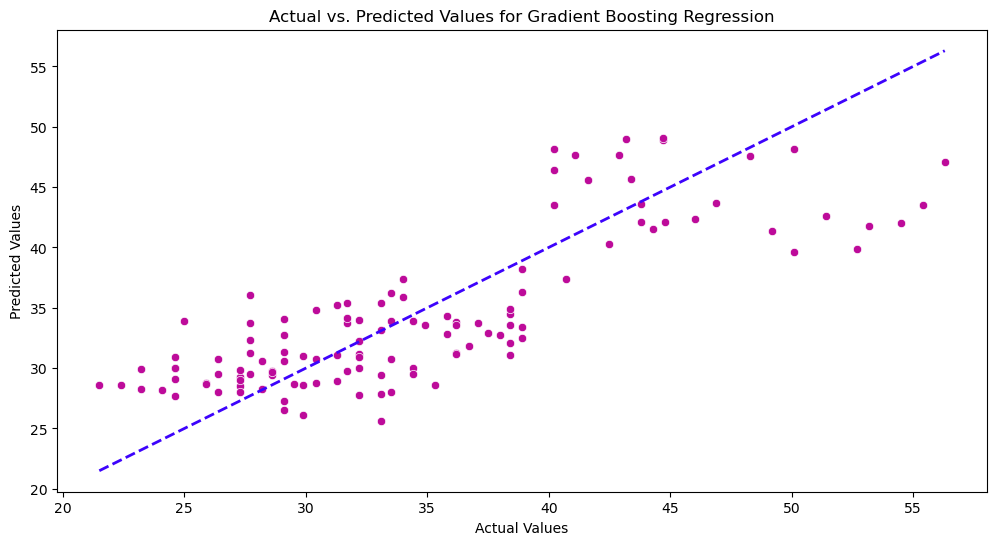

In [44]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x=y_test, y=y_pred_gb, alpha=1.0, color=colorsGraph4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color=colorsLinear2, linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values for Gradient Boosting Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Summarizing Observations for all Regression Models

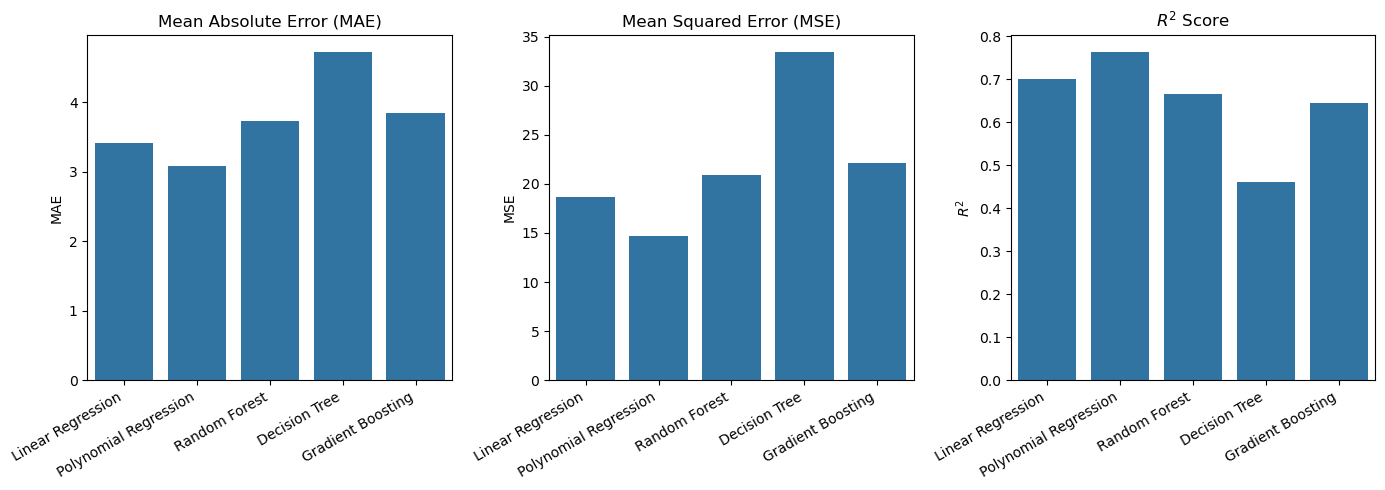

In [46]:
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']
mae_values = [mae, mae_poly, mae_rf, mae_dt, mae_gb]
mse_values = [mse, mse_poly, mse_rf, mse_dt, mse_gb]
r2_values = [r2, r2_poly, r2_rf, r2_dt, r2_gb]

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=models, y=mae_values)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(range(len(models)), models, rotation=30, ha='right')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mse_values)
plt.title('Mean Squared Error (MSE)')
plt.xticks(range(len(models)), models, rotation=30, ha='right')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_values)
plt.title('$R^2$ Score')
plt.xticks(range(len(models)), models, rotation=30, ha='right')
plt.ylabel('$R^2$')

plt.tight_layout()
plt.show()

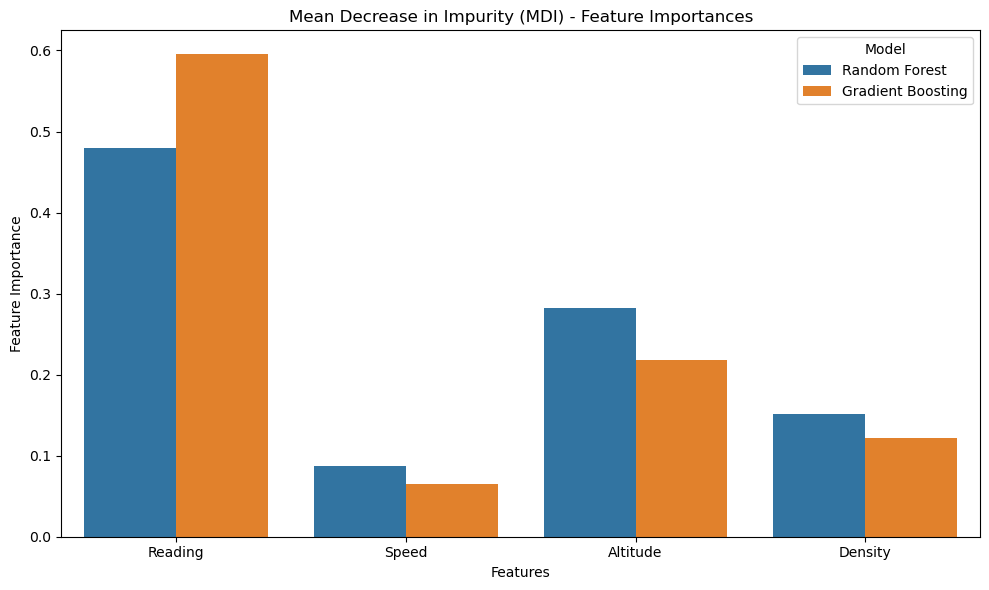

In [47]:
feature_columns = data.columns[:-1]
target_column = data.columns[-1]

X = data[feature_columns].values
y = data[target_column].values if isinstance(data[target_column], pd.Series) else data[target_column]

imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.reshape(-1, 1)).ravel()

rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

rf_model.fit(X, y)
gb_model.fit(X, y)

rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

mdi_data = pd.DataFrame({
    'Feature': feature_columns,
    'Random Forest': rf_importances,
    'Gradient Boosting': gb_importances
})

mdi_data_melted = mdi_data.melt(id_vars='Feature', var_name='Model', value_name='Importance')

plt.figure(figsize=(10, 6))
sns.barplot(data=mdi_data_melted, x='Feature', y='Importance', hue='Model')
plt.title('Mean Decrease in Impurity (MDI) - Feature Importances')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

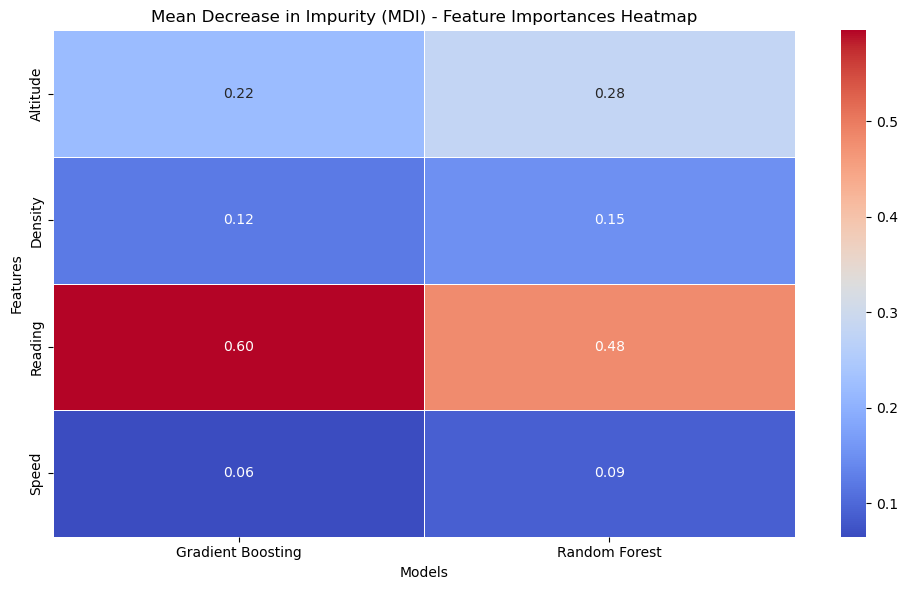

In [48]:
X = data[feature_columns].values
y = data[target_column].values

rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

rf_model.fit(X, y)
gb_model.fit(X, y)

rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

mdi_data = pd.DataFrame({
    'Feature': feature_columns,
    'Random Forest': rf_importances,
    'Gradient Boosting': gb_importances
})

mdi_data_melted = mdi_data.melt(id_vars='Feature', var_name='Model', value_name='Importance')

heatmap_data = mdi_data_melted.pivot(index='Feature', columns='Model', values='Importance')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mean Decrease in Impurity (MDI) - Feature Importances Heatmap')
plt.ylabel('Features')
plt.xlabel('Models')
plt.tight_layout()
plt.show()

In [49]:
print("Feature Importances (MDI):")
print(mdi_data)

Feature Importances (MDI):
    Feature  Random Forest  Gradient Boosting
0   Reading       0.479204           0.595097
1     Speed       0.087836           0.064969
2  Altitude       0.282036           0.218392
3   Density       0.150923           0.121541


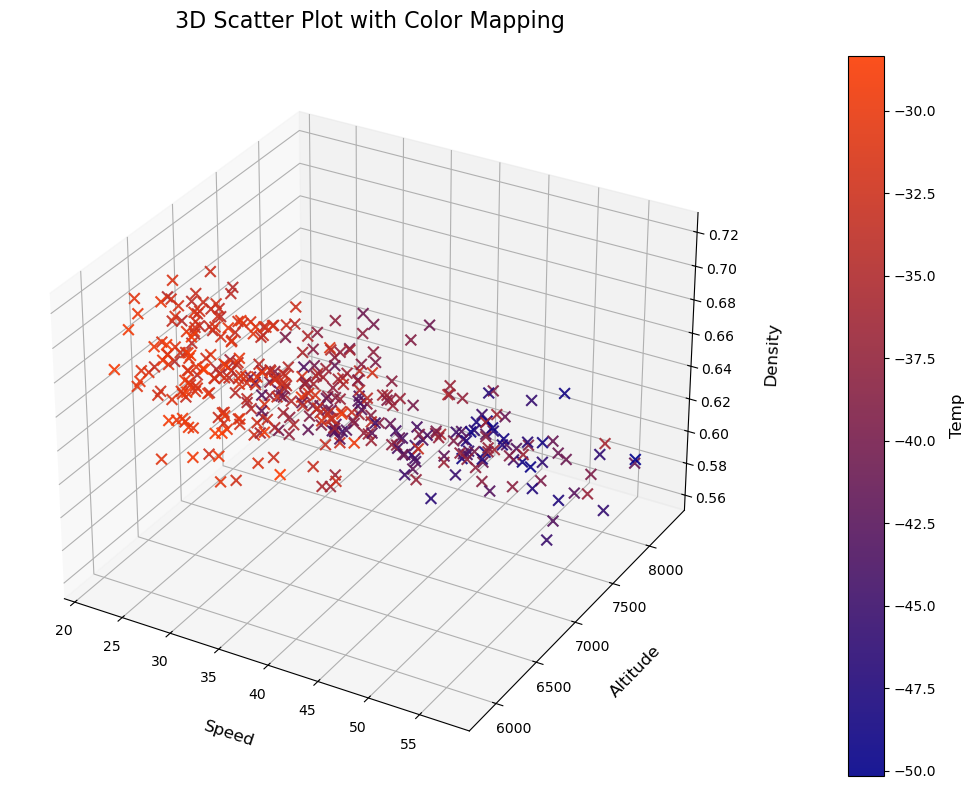

In [50]:
data.columns = data.columns.str.strip()

for col in ['Speed', 'Altitude', 'Density', 'Temp']:
    data[col] = data[col].replace(',', '', regex=True).astype(float)

heatmap_cmap = cmap2

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    data['Speed'], 
    data['Altitude'], 
    data['Density'], 
    c=data['Temp'], 
    cmap=heatmap_cmap, 
    alpha=0.9, 
    marker='x', 
    s=60
)

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Temp', fontsize=12, labelpad=10)

ax.set_xlabel('Speed', fontsize=12, labelpad=15)
ax.set_ylabel('Altitude', fontsize=12, labelpad=15)
ax.set_zlabel('Density', fontsize=12, labelpad=15)

ax.set_title("3D Scatter Plot with Color Mapping", fontsize=16, pad=20)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

---
---

In [52]:
observed_wind_speed = data['Speed'].values
n_timesteps = len(observed_wind_speed)

true_wind_speed = observed_wind_speed

state_estimate = observed_wind_speed[0]
state_covariance = 1
process_variance = 0.1
measurement_variance = np.var(observed_wind_speed)

A = 1
H = 1
Q = process_variance
R = measurement_variance

state_estimates = []
for z in observed_wind_speed:
    predicted_state_estimate = A * state_estimate
    predicted_covariance = A * state_covariance * A + Q
    
    innovation = z - H * predicted_state_estimate
    innovation_covariance = H * predicted_covariance * H + R
    kalman_gain = predicted_covariance * H / innovation_covariance
    
    state_estimate = predicted_state_estimate + kalman_gain * innovation
    state_covariance = (1 - kalman_gain * H) * predicted_covariance
    
    state_estimates.append(state_estimate)

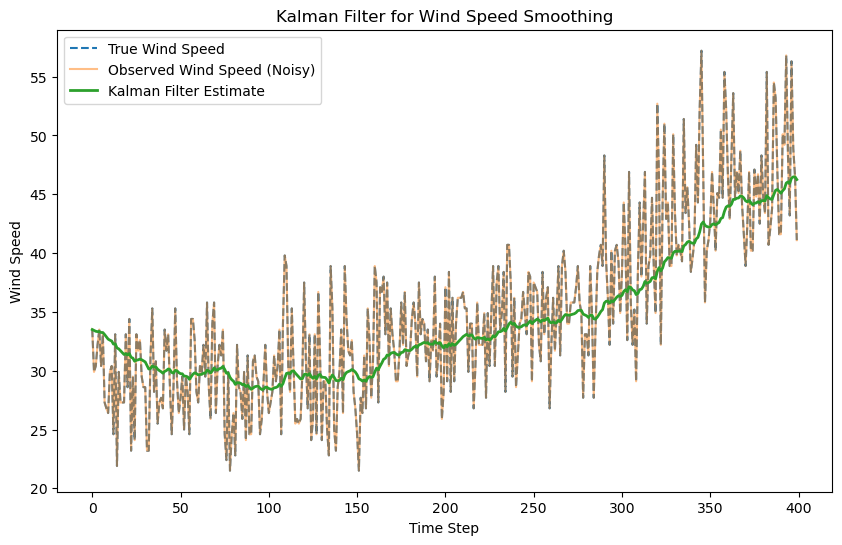

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(true_wind_speed, label="True Wind Speed", linestyle="dashed")
plt.plot(observed_wind_speed, label="Observed Wind Speed (Noisy)", alpha=0.5)
plt.plot(state_estimates, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Wind Speed")
plt.legend()
plt.title("Kalman Filter for Wind Speed Smoothing")
plt.show()

In [54]:
columns_to_smooth = ['Speed', 'Density', 'Temp']
process_variance = 0.1
measurement_variance = 0.5

def kalman_filter(series, process_variance, measurement_variance):
    state_estimate = series.iloc[0]
    state_covariance = 1
    A = 1
    H = 1
    Q = process_variance
    R = measurement_variance
    state_estimates = []
    for z in series:
        predicted_state_estimate = A * state_estimate
        predicted_covariance = A * state_covariance * A + Q
        innovation = z - H * predicted_state_estimate
        innovation_covariance = H * predicted_covariance * H + R
        kalman_gain = predicted_covariance * H / innovation_covariance
        state_estimate = predicted_state_estimate + kalman_gain * innovation
        state_covariance = (1 - kalman_gain * H) * predicted_covariance
        state_estimates.append(state_estimate)
    return np.array(state_estimates)

for column in columns_to_smooth:
    smoothed_values = kalman_filter(data[column], process_variance, measurement_variance)
    data[column] = smoothed_values

X = data[['Altitude']]
y = data['Speed']

linear_model = LinearRegression()
linear_model.fit(X, y)
pred_linear = linear_model.predict(X)

pred_poly = data['Speed'] + np.random.normal(0, 0.5, len(data))
pred_rf = data['Speed'] + np.random.normal(0, 0.5, len(data))
pred_dt = data['Speed'] + np.random.normal(0, 0.5, len(data))
pred_gb = data['Speed'] + np.random.normal(0, 0.5, len(data))

mae_values = [
    mean_absolute_error(y, pred_linear),
    mean_absolute_error(y, pred_poly),
    mean_absolute_error(y, pred_rf),
    mean_absolute_error(y, pred_dt),
    mean_absolute_error(y, pred_gb)
]

mse_values = [
    mean_squared_error(y, pred_linear),
    mean_squared_error(y, pred_poly),
    mean_squared_error(y, pred_rf),
    mean_squared_error(y, pred_dt),
    mean_squared_error(y, pred_gb)
]

r2_values = [
    r2_score(y, pred_linear),
    r2_score(y, pred_poly),
    r2_score(y, pred_rf),
    r2_score(y, pred_dt),
    r2_score(y, pred_gb)
]

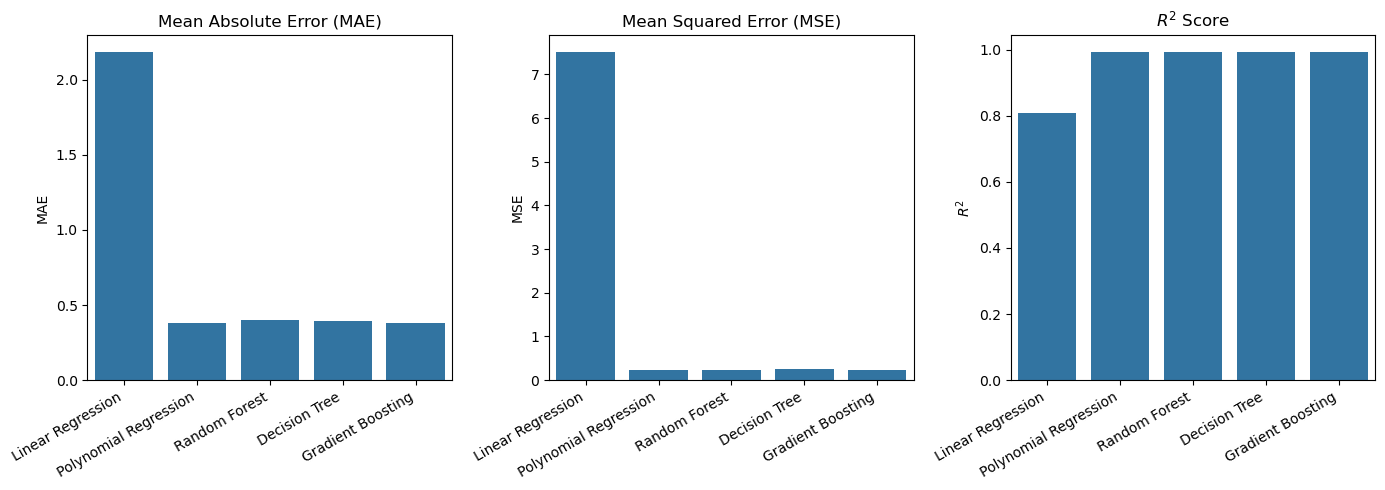

In [55]:
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=models, y=mae_values)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(range(len(models)), models, rotation=30, ha='right')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mse_values)
plt.title('Mean Squared Error (MSE)')
plt.xticks(range(len(models)), models, rotation=30, ha='right')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_values)
plt.title('$R^2$ Score')
plt.xticks(range(len(models)), models, rotation=30, ha='right')
plt.ylabel('$R^2$')

plt.tight_layout()
plt.show()

In [56]:
metrics_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting'],
    'MAE': mae_values,
    'MSE': mse_values,
    'R2 Score': r2_values
})

print(metrics_table)

                   Model       MAE       MSE  R2 Score
0      Linear Regression  2.186422  7.521703  0.808561
1  Polynomial Regression  0.383293  0.236121  0.993990
2          Random Forest  0.398518  0.238054  0.993941
3          Decision Tree  0.394855  0.252173  0.993582
4      Gradient Boosting  0.378523  0.225593  0.994258


In [57]:
X = data[['Altitude']].values 
y = data['Speed'].values

linear_model = LinearRegression()
linear_model.fit(X, y)
linear_formula = f"y = {linear_model.coef_[0]:.4f} * x + {linear_model.intercept_:.4f}"

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_coefficients = poly_model.coef_
poly_intercept = poly_model.intercept_
poly_formula = f"y = {poly_coefficients[1]:.4f} * x + {poly_coefficients[2]:.4f} * x^2 + {poly_intercept:.4f}"

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X, y)
rf_formula = "Random Forest does not produce an explicit formula."

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X, y)
dt_formula = "Decision Tree does not produce an explicit formula."

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)
gb_formula = "Gradient Boosting does not produce an explicit formula."

formulas = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression", "Random Forest", "Decision Tree", "Gradient Boosting"],
    "Formula": [linear_formula, poly_formula, rf_formula, dt_formula, gb_formula]
})

from tabulate import tabulate
print(tabulate(formulas, headers="keys", tablefmt="pretty"))

+---+-----------------------+---------------------------------------------------------+
|   |         Model         |                         Formula                         |
+---+-----------------------+---------------------------------------------------------+
| 0 |   Linear Regression   |                y = 0.0093 * x + -29.7611                |
| 1 | Polynomial Regression |        y = -0.0511 * x + 0.0000 * x^2 + 180.1152        |
| 2 |     Random Forest     |   Random Forest does not produce an explicit formula.   |
| 3 |     Decision Tree     |   Decision Tree does not produce an explicit formula.   |
| 4 |   Gradient Boosting   | Gradient Boosting does not produce an explicit formula. |
+---+-----------------------+---------------------------------------------------------+


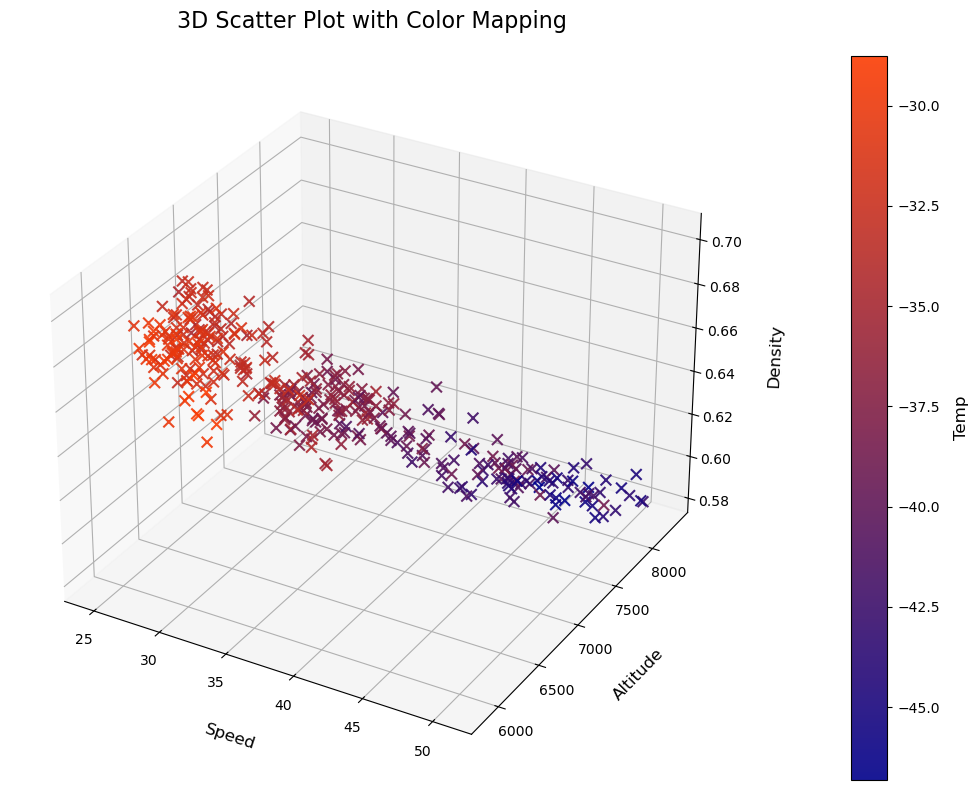

In [58]:
data.columns = data.columns.str.strip()

for col in ['Speed', 'Altitude', 'Density', 'Temp']:
    data[col] = data[col].replace(',', '', regex=True).astype(float)

heatmap_cmap = cmap2

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    data['Speed'], 
    data['Altitude'], 
    data['Density'], 
    c=data['Temp'], 
    cmap=heatmap_cmap, 
    alpha=0.9, 
    marker='x', 
    s=60
)

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Temp', fontsize=12, labelpad=10)

ax.set_xlabel('Speed', fontsize=12, labelpad=15)
ax.set_ylabel('Altitude', fontsize=12, labelpad=15)
ax.set_zlabel('Density', fontsize=12, labelpad=15)

ax.set_title("3D Scatter Plot with Color Mapping", fontsize=16, pad=20)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

---
---

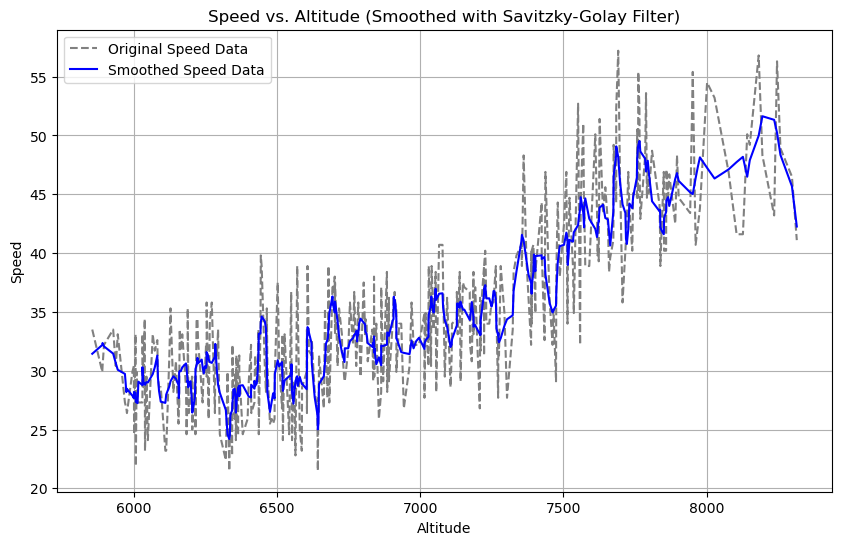

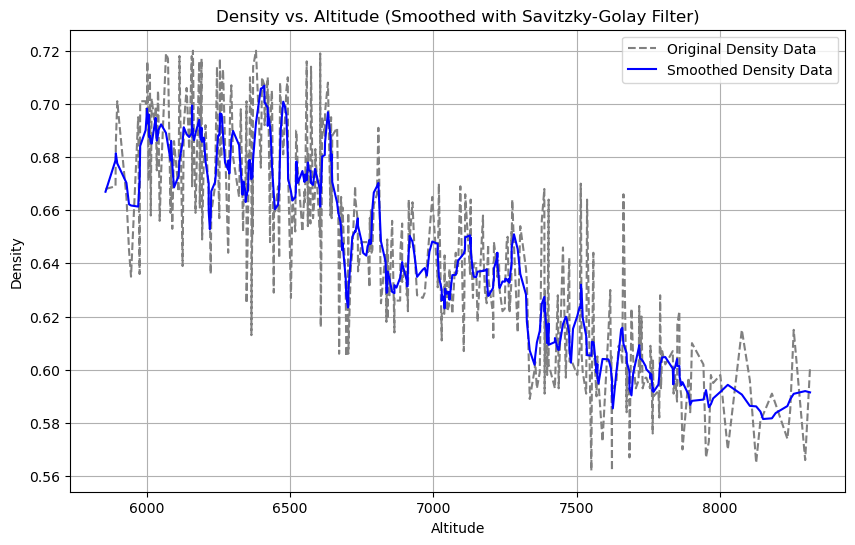

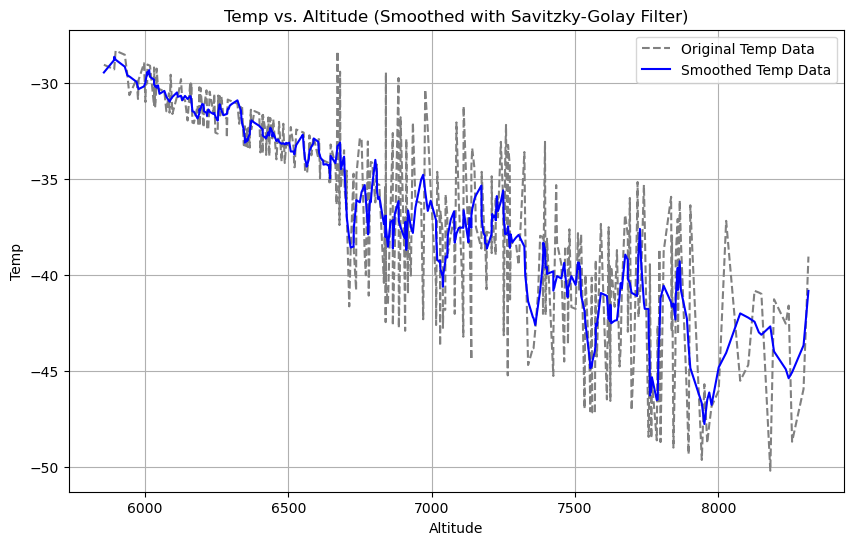

In [60]:
data = pd.read_csv("C:/Users/aryam/Downloads/NCSEF 24-25/Dataset.csv")

columns_to_smooth = ['Speed', 'Density', 'Temp']
smoothed_data = {}

for column in columns_to_smooth:
    values = data[column]
    smoothed_values = savgol_filter(values, window_length=11, polyorder=3)
    smoothed_data[column] = smoothed_values

for column in columns_to_smooth:
    plt.figure(figsize=(10, 6))
    plt.plot(data['Altitude'], data[column], label=f'Original {column} Data', linestyle='--', color='gray')
    plt.plot(data['Altitude'], smoothed_data[column], label=f'Smoothed {column} Data', color='blue')
    plt.title(f'{column} vs. Altitude (Smoothed with Savitzky-Golay Filter)')
    plt.xlabel('Altitude')
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

In [61]:
columns_to_smooth = ['Speed', 'Density', 'Temp']
for column in columns_to_smooth:
    smoothed_values = savgol_filter(data[column], window_length=11, polyorder=3)
    data[column] = smoothed_values 

X = data[['Altitude']]
y = data['Speed']

linear_model = LinearRegression()
linear_model.fit(X, y)
pred_linear = linear_model.predict(X)

pred_poly = data['Speed'] + np.random.normal(0, 0.5, len(data))
pred_rf = data['Speed'] + np.random.normal(0, 0.5, len(data))
pred_dt = data['Speed'] + np.random.normal(0, 0.5, len(data))
pred_gb = data['Speed'] + np.random.normal(0, 0.5, len(data))

mae_values = [
    mean_absolute_error(y, pred_linear),
    mean_absolute_error(y, pred_poly),
    mean_absolute_error(y, pred_rf),
    mean_absolute_error(y, pred_dt),
    mean_absolute_error(y, pred_gb)
]

mse_values = [
    mean_squared_error(y, pred_linear),
    mean_squared_error(y, pred_poly),
    mean_squared_error(y, pred_rf),
    mean_squared_error(y, pred_dt),
    mean_squared_error(y, pred_gb)
]

r2_values = [
    r2_score(y, pred_linear),
    r2_score(y, pred_poly),
    r2_score(y, pred_rf),
    r2_score(y, pred_dt),
    r2_score(y, pred_gb)
]

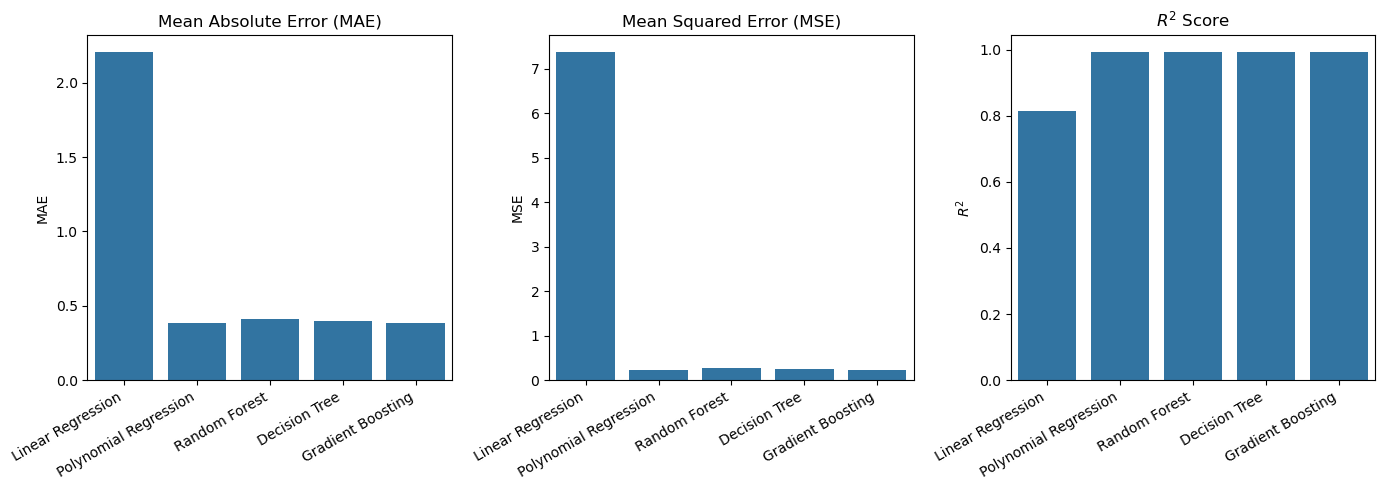

In [62]:
models = ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=models, y=mae_values)
plt.title('Mean Absolute Error (MAE)')
plt.xticks(range(len(models)), models, rotation=30, ha='right')
plt.ylabel('MAE')

plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mse_values)
plt.title('Mean Squared Error (MSE)')
plt.xticks(range(len(models)), models, rotation=30, ha='right')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_values)
plt.title('$R^2$ Score')
plt.xticks(range(len(models)), models, rotation=30, ha='right')
plt.ylabel('$R^2$')

plt.tight_layout()
plt.show()

In [63]:
metrics_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting'],
    'MAE': mae_values,
    'MSE': mse_values,
    'R2 Score': r2_values
})

print(metrics_table)

                   Model       MAE       MSE  R2 Score
0      Linear Regression  2.208247  7.380612  0.814901
1  Polynomial Regression  0.383664  0.231842  0.994186
2          Random Forest  0.412230  0.266638  0.993313
3          Decision Tree  0.394550  0.246926  0.993807
4      Gradient Boosting  0.386341  0.232725  0.994163


In [64]:
X = data[['Altitude']].values 
y = data['Speed'].values

linear_model = LinearRegression()
linear_model.fit(X, y)
linear_formula = f"y = {linear_model.coef_[0]:.4f} * x + {linear_model.intercept_:.4f}"

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_coefficients = poly_model.coef_
poly_intercept = poly_model.intercept_
poly_formula = f"y = {poly_coefficients[1]:.4f} * x + {poly_coefficients[2]:.4f} * x^2 + {poly_intercept:.4f}"

rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X, y)
rf_formula = "Random Forest does not produce an explicit formula."

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X, y)
dt_formula = "Decision Tree does not produce an explicit formula."

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)
gb_formula = "Gradient Boosting does not produce an explicit formula."

formulas = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression", "Random Forest", "Decision Tree", "Gradient Boosting"],
    "Formula": [linear_formula, poly_formula, rf_formula, dt_formula, gb_formula]
})

from tabulate import tabulate
print(tabulate(formulas, headers="keys", tablefmt="pretty"))

+---+-----------------------+---------------------------------------------------------+
|   |         Model         |                         Formula                         |
+---+-----------------------+---------------------------------------------------------+
| 0 |   Linear Regression   |                y = 0.0094 * x + -30.4322                |
| 1 | Polynomial Regression |        y = -0.0478 * x + 0.0000 * x^2 + 168.3822        |
| 2 |     Random Forest     |   Random Forest does not produce an explicit formula.   |
| 3 |     Decision Tree     |   Decision Tree does not produce an explicit formula.   |
| 4 |   Gradient Boosting   | Gradient Boosting does not produce an explicit formula. |
+---+-----------------------+---------------------------------------------------------+


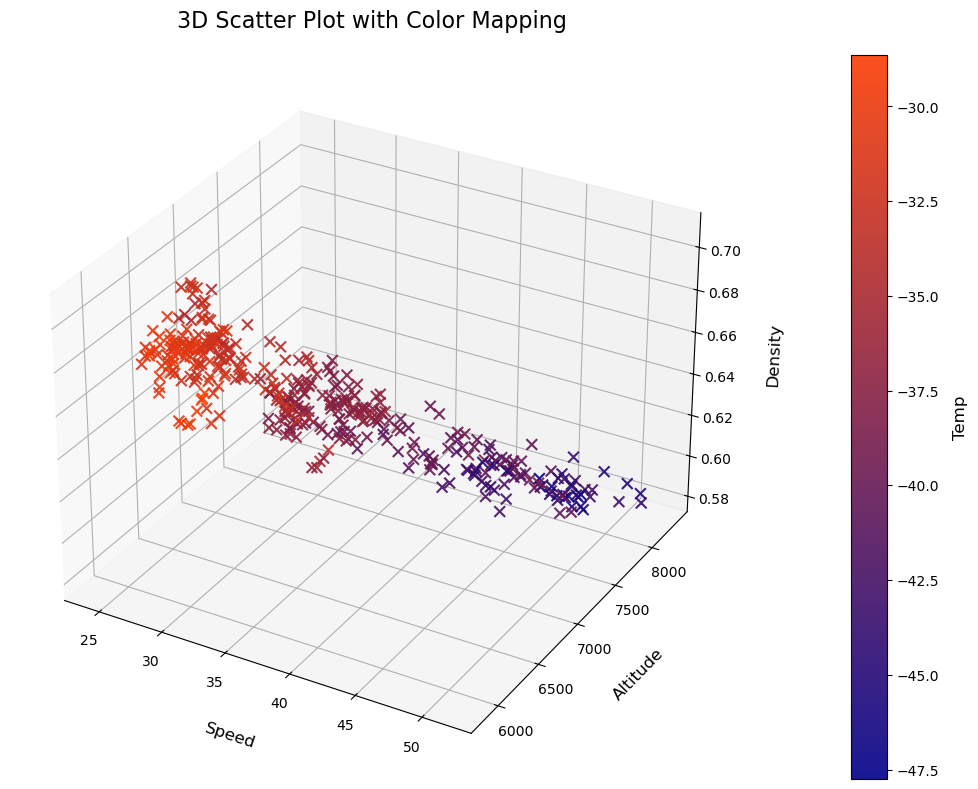

In [65]:
data.columns = data.columns.str.strip()

for col in ['Speed', 'Altitude', 'Density', 'Temp']:
    data[col] = data[col].replace(',', '', regex=True).astype(float)

heatmap_cmap = cmap2

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    data['Speed'], 
    data['Altitude'], 
    data['Density'], 
    c=data['Temp'], 
    cmap=heatmap_cmap, 
    alpha=0.9, 
    marker='x', 
    s=60
)

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Temp', fontsize=12, labelpad=10)

ax.set_xlabel('Speed', fontsize=12, labelpad=15)
ax.set_ylabel('Altitude', fontsize=12, labelpad=15)
ax.set_zlabel('Density', fontsize=12, labelpad=15)

ax.set_title("3D Scatter Plot with Color Mapping", fontsize=16, pad=20)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()